# Pymaceuticals Inc.
---

### Analysis

- First, I removed the duplicate mice so there would be no redundant records. I calculated summary statistics for all the data so I could better see what was happeningThen, I created a bar graph that showed Capumolin and Ramacane had the two highest timepoints. The gendered pie chart showed that there were more male than female mice but only by a small margin. Then I found the box-and-whisker plot and  outliers of the data when reflected to have the greatest timepoint for each mouse. Infubinol and Ceftamin had the highest tumor volume. With "cap," the tumor volum in I509 has gone down. If mice are a larger weight their tumor volume goes up.
 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np
from scipy import stats


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_complete.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [5]:
# Checking the number of mice.
mouse_count = study_complete.loc[:,"Mouse ID"].nunique()
mouse_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_duplicates = study_complete[study_complete.duplicated(keep=False)]
study_duplicates

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
study_duplicates

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0

In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_complete_no_duplicates = study_complete.drop(study_complete.index[909])
study_complete_no_duplicates.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_count_no_duplicates = study_complete_no_duplicates.loc[:,"Mouse ID"].nunique()
mouse_count_no_duplicates 

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = (study_complete.groupby(by = "Drug Regimen", as_index = True).mean())['Tumor Volume (mm3)']
mean_tumor_volume
median_tumor_volume = (study_complete.groupby(by = "Drug Regimen", as_index = True).median())['Tumor Volume (mm3)']
median_tumor_volume
variance_tumor_volume = (study_complete.groupby(by = "Drug Regimen", as_index = True).var())['Tumor Volume (mm3)']
variance_tumor_volume
st_dev_tumor_volume = (study_complete.groupby(by = "Drug Regimen", as_index = True).std())['Tumor Volume (mm3)']
st_dev_tumor_volume
SEM_tumor_volume = (study_complete.groupby(by = "Drug Regimen", as_index = True).sem())['Tumor Volume (mm3)']
SEM_tumor_volume

tumor_volume_stats_df = [mean_tumor_volume, median_tumor_volume, variance_tumor_volume, st_dev_tumor_volume, SEM_tumor_volume]
combined_tumor_volume_stats = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen']), tumor_volume_stats_df)
combined_tumor_volume_stats.columns=['mean_tumor_volume', 'median_tumor_volume', 'variance_tumor_volume', 'st_dev_tumor_volume', 'SEM_tumor_volume']
combined_tumor_volume_stats

C:\Users\ganes\AppData\Local\Temp\ipykernel_17804\3883635644.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_volume = (study_complete.groupby(by = "Drug Regimen", as_index = True).mean())['Tumor Volume (mm3)']
C:\Users\ganes\AppData\Local\Temp\ipykernel_17804\3883635644.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_volume = (study_complete.groupby(by = "Drug Regimen", as_index = True).median())['Tumor Volume (mm3)']
C:\Users\ganes\AppData\Local\Temp\ipykernel_17804\3883635644.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In

mean_tumor_volume  median_tumor_volume  variance_tumor_volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              st_dev_tumor_volume  SEM_tumor_volume  
Drug Regimen                                         
Capomulin                4.994774          0.329346  
Ceftamin                 6.268188          0.469821  
Infubinol                6.567243          0.492236  
Ketapril                 8.279709          0.603860  
Naftisol                 8.134708          0.596466  
Placebo                  7.821003          0.581331  
Propriva                 6.507770          0.512884  
Ramicane                 4.846308          0.320955  
Stelasyn                 7.710419          0.573111  
Zoniferol                6.966589          0.516398

In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_volume = study_complete.groupby('Drug Regimen')
tumor_volume
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_statistics = tumor_volume.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
tumor_volume_statistics

C:\Users\ganes\AppData\Local\Temp\ipykernel_17804\1702489004.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tumor_volume_statistics = tumor_volume.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Timepoints')

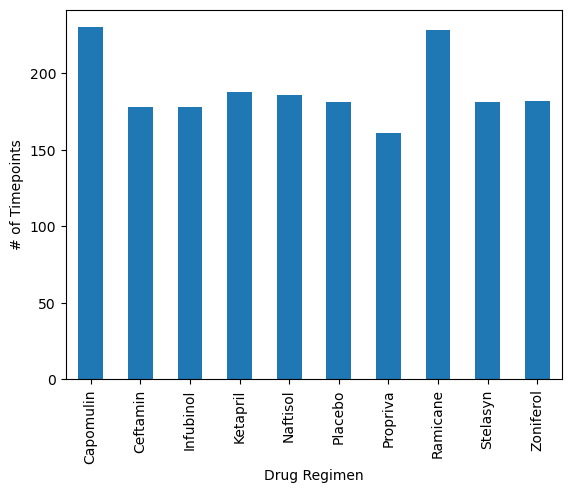

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Treatment_Plot_Data = (study_complete.groupby(by = "Drug Regimen", as_index = True).count())['Mouse ID']
Drug_Treatment_Plot_Data
Drug_Treatment_Plot_Data.plot(kind="bar")
plt.ylabel("# of Timepoints")

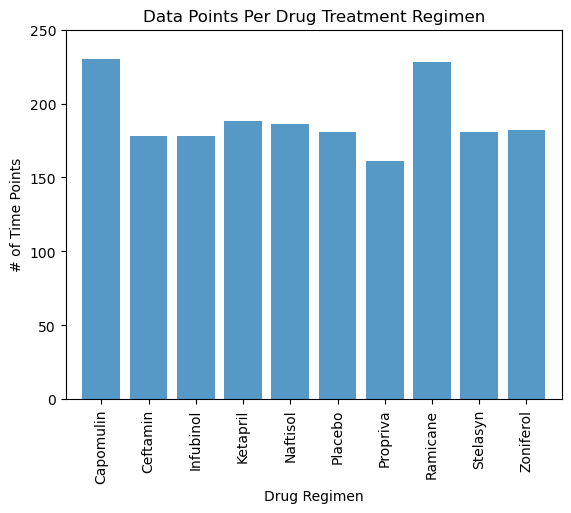

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

Drug_Treatment_Plot_Data2 = study_complete.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
x_axis = np.arange(len(Drug_Treatment_Plot_Data2))

tick_locations = [x for x in x_axis]

new_drug_df = pd.DataFrame(Drug_Treatment_Plot_Data2)
reset = new_drug_df.reset_index()

plt.bar(x_axis, new_drug_df['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, reset['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(Drug_Treatment_Plot_Data)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Time Points")

plt.show()

Text(0, 0.5, 'Sex')

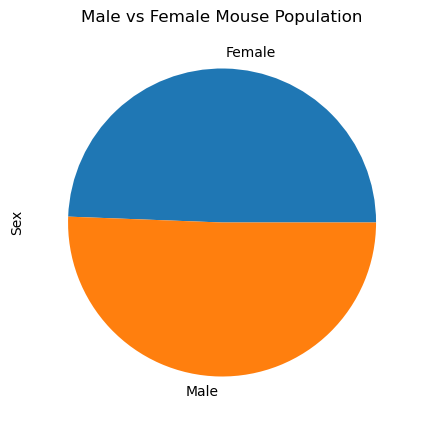

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice = (study_complete.groupby(by = "Sex", as_index = True).count())['Mouse ID']
gender_mice
gender_mice_pie_plot = gender_mice.plot.pie(subplots=True, figsize=(5, 5))
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

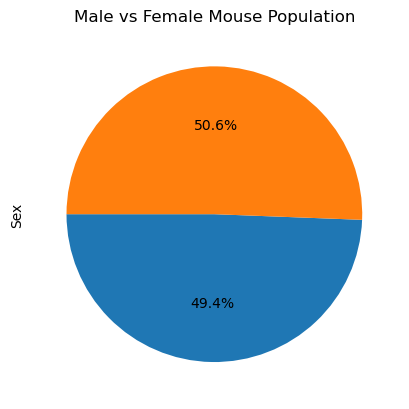

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_array = gender_mice.to_numpy()
plt.pie(gender_array, autopct="%1.1f%%",startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = study_complete_no_duplicates.loc[study_complete_no_duplicates["Drug Regimen"] == "Capomulin",:]
# Start by getting the last (greatest) timepoint for each mouse
study_complete_total = study_complete.groupby('Mouse ID').max()['Timepoint']
study_complete_total
study_complete_total.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_study_complete = pd.merge(study_complete_total, study_complete, how="left", on=["Mouse ID", "Timepoint"])
merged_study_complete

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
244     z435         10     Propriva  Female          12          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   
247     z795         45     Naftisol  Female          13          29   
248     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
244           48.710661                 0  
245           30.638696                 0  
246           62.754451                 3  
247           65.741070                 3  
248           73.867845                 4  

[249 rows x 8 columns]

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_study_complete.loc[merged_study_complete['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(final_tumor_vol)
    
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerQuart = quartiles[0.25]
upperQuart = quartiles[0.75]
iqr = upperQuart - lowerQuart
upperBound = lowerQuart - (1.5*iqr)
lowerBound = upperQuart + (1.5*iqr)
#Determine outliers using upper and lower bounds
outliers = final_tumor_vol.loc[(final_tumor_vol < lowerBound)| (final_tumor_vol > upperBound)]
print(f"{drug}'s potential outliers:{outliers}")

Ceftamin's potential outliers:3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64


Text(0.5, 1.0, 'Tumor Volume Data for Different Drug Regimens')

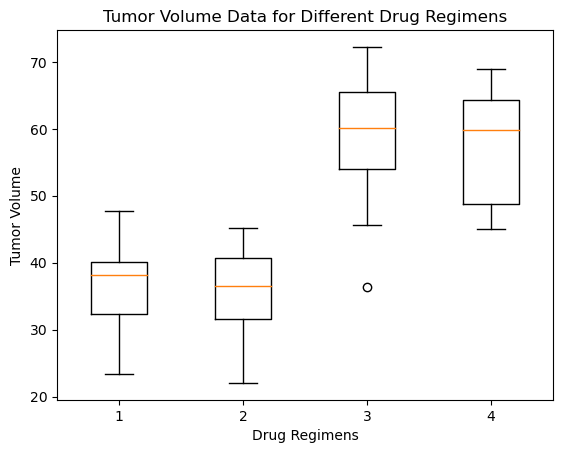

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data)
plt.ylabel('Tumor Volume')
plt.xlabel('Drug Regimens')
plt.title('Tumor Volume Data for Different Drug Regimens')

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse I509')

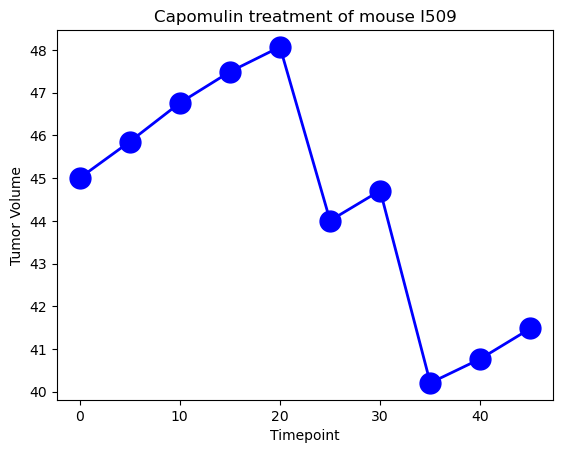

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

cap_for_single = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
cap_for_single.head()
x_axis = cap_for_single["Timepoint"]
tumsize = cap_for_single["Tumor Volume (mm3)"]
plt.plot(x_axis, tumsize,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
plt.title('Capomulin treatment of mouse I509')

C:\Users\ganes\AppData\Local\Temp\ipykernel_20392\2325590095.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

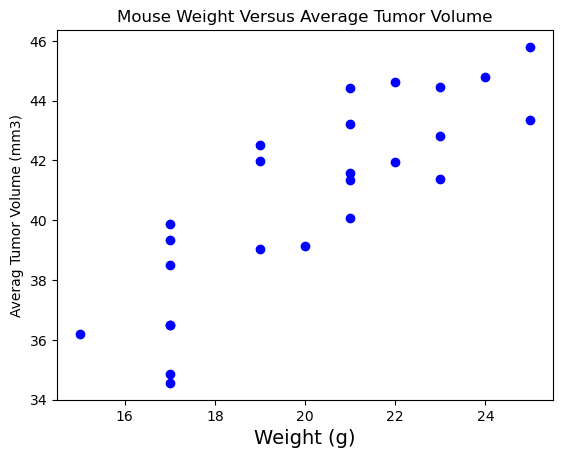

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()

avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The r-squared is: 0.709


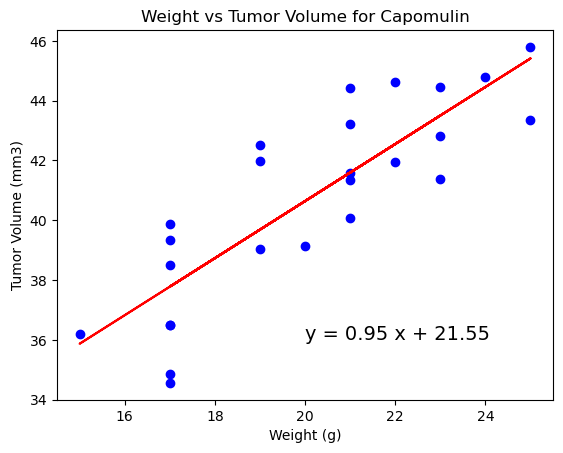

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()